___
### <center> <u> <h1> <strong> Calcul de la dérivée d'une fonction par Différence finie </strong> </h1> </center>

<h3>
<ul>
<li> Dans ce notebook  nous verrons comment évaluer la dérivée d'une fonction par la méthode des diifférences finies  </li>    
<li> L'utilisation de la méthode suppose au préalable que la fonction est discrétisée/échantillonée </li>
    </ul>
    </h3>
    
---

<h1> <strong> A - Importation des modules necessaires

In [1]:
import numpy as np
import matplotlib.pyplot as plt

<h1> <strong> B - Classe python qui gère les dérivées

In [2]:
class DeriveDeFonctions(  ) :
    """
    DESCRIPTION : 
    ------------
        Objet Python qui contient des méthodes permettant de calculer les dérivées d'une fonction donnée

    AUTHOR : 
    --------
        BRICE KENGNI ZANGUIM
        kenzabri2@yahoo.com

    """
    def __init__ ( self , function , h ) :
        """
        DESCRIPTION : 
        ------------
            Constructeur de la classe qui defini et construit les variables pertinentes de l'objet
        
        PARAMETRES : 
        -----------
            - function : list, np.array
                function dont la dérivée doit être évaluée
            
            - h : float
                Représente le pas d'intégration de la fonction
                    
        OUTPUT :  None
        ------- 
            
        AUTHOR : 
        --------
            BRICE KENGNI ZANGUIM
            kenzabri2@yahoo.com
        
        """
        
        self.function = np.array(function)
        self.h = h
        
    def derivee_avant_a_1_point( self, f =None , h = None  ) :
        """
        DESCRIPTION : 
        ------------
            Calcul la dérivée d'une fonction par la méthode des différences finies en avant. La dérivée en un point est évaluée au regard d'un point suivant
                    
        OUTPUT :  np.array
        ------- 
            Retourne la dérivée de la fonction
        AUTHOR : 
        --------
            BRICE KENGNI ZANGUIM
            kenzabri2@yahoo.com
        
        """
        if f is not None :
            self.function = f
        if h is not None : 
            self.h = h
            
        a = ( self.function[1:] - self.function[:-1] )/self.h
        a = list(a)
        a.insert( len(a), 2*a[-1]-a[-2])
        return  np.array(a)
    
    def derivee_arrière_a_1_point( self, f =None , h = None ) :
        """
        DESCRIPTION : 
        ------------
            Calcul la dérivée d'une fonction par la méthode des différences finies en avant. La dérivée en un point est évaluée au regard d'un point précédant
        
        OUTPUT :  np.array
        ------- 
            Retourne la dérivée de la fonction
        AUTHOR : 
        --------
            BRICE KENGNI ZANGUIM
            kenzabri2@yahoo.com
        
        """
        if f is not None :
            self.function = f
        if h is not None : 
            self.h = h
            
        a = ( self.function[1:] - self.function[:-1] )/self.h
        a = list(a)
        a.insert(0, 2*a[0]-a[1] )
        return  np.array(a)
    
    def derivee_centrale_a_1_point( self, f =None, h = None ): 
        """
        DESCRIPTION : 
        ------------
            Calcul la dérivée d'une fonction par la méthode des différences finies en avant. La dérivée en un point est évaluée au regard des deux points l'entourant
        
        OUTPUT :  np.array
        ------- 
            Retourne la dérivée de la fonction
        AUTHOR : 
        --------
            BRICE KENGNI ZANGUIM
            kenzabri2@yahoo.com
        
        """
        if f is not None :
            self.function = f
        if h is not None : 
            self.h = h
            
        a = ( self.function[2:] - self.function[:-2] )/(2*self.h)
        a = list(a)
        a.insert(0,2*a[0]-a[1] )
        a.insert(len(a), 2*a[-1]-a[-2])
        return  np.array(a)
    
    def erreur( self, df_vraie , df_approx ) :
        """
        DESCRIPTION : 
        ------------
            Calcul l'errreur faite lors du calcul d'une dérivée approximative
        
        OUTPUT :  float
        ------- 
            retourne la valeur de l'erreur
            
        AUTHOR : 
        --------
            BRICE KENGNI ZANGUIM
            kenzabri2@yahoo.com
        
        """
        
        return np.sqrt( np.mean((np.array(df_vraie) - np.array(df_approx))**2) )

<h1> <strong> C - évaluation des fonctions et représentation graphique

<h2>
    
    Soit la fonction suivante

In [3]:
t = np.linspace(0,2, 200)

f = np.sin(2*np.pi*3*t) - np.cos(2*np.pi*5*t)

<h2>
    
    Sa dérivée première analytique est 

In [4]:
df = 2*np.pi*( 3*np.cos(2*np.pi*3*t)  + 5*np.sin(2*np.pi*5*t))

<h2>
    
    Les deux fonction se présentent comme suit graphiquement :

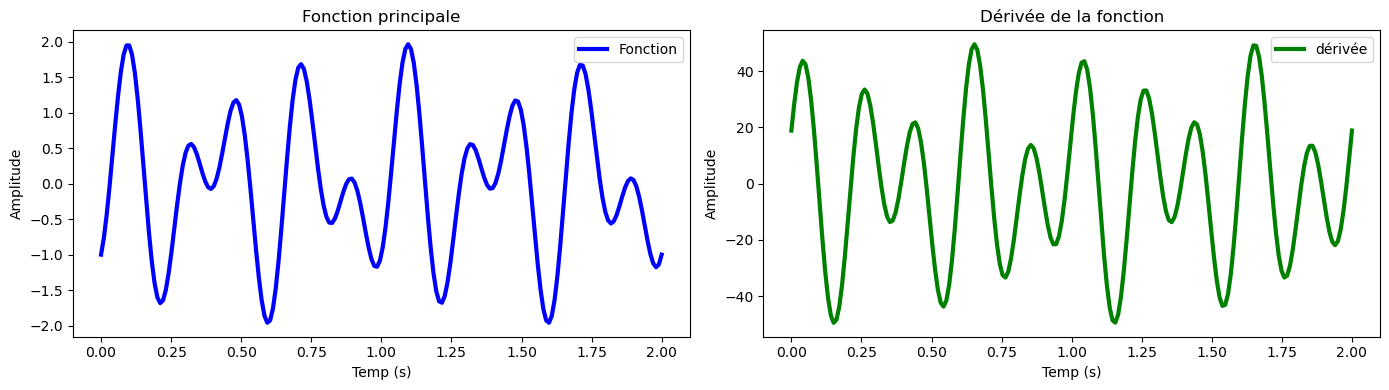

In [5]:
fig, ax = plt.subplots(1, 2, figsize = (14,4))

ax[0].plot(t , f, color = 'blue', lw = 3 , label = "Fonction")
ax[0].set_xlabel("Temp (s)")
ax[0].set_ylabel("Amplitude")
ax[0].legend()
ax[0].title.set_text("Fonction principale")


ax[1].plot(t , df, color = 'green', lw  = 3, label = "dérivée")
ax[1].set_xlabel("Temp (s)")
ax[1].set_ylabel("Amplitude")
ax[1].legend()
ax[1].title.set_text("Dérivée de la fonction")

plt.tight_layout()
plt.show()

<h1> <strong> D - Dérivées avant, arrière et centrée par la méthode des éléments finis

<h2>
    
    Commençons par définir l'objet qui nous permettra d'évaluer les dérivées

In [6]:
derive_object = DeriveDeFonctions( f , t[1] )

<h2>
    
    Evaluons à présent les dérivées

In [7]:
df1_avant = derive_object.derivee_avant_a_1_point()

In [8]:
df1_arriere = derive_object.derivee_arrière_a_1_point()

In [9]:
df1_centre = derive_object.derivee_centrale_a_1_point()

<h1> <strong> E - Représentation graphique des dérivées

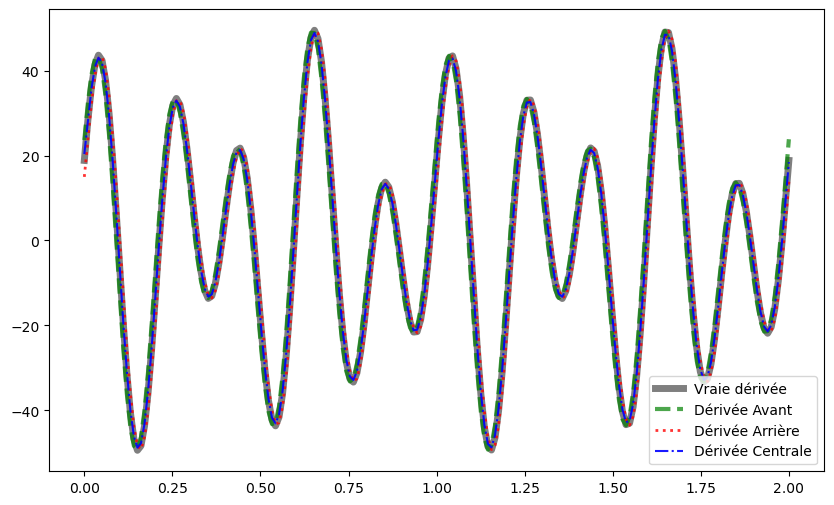

In [10]:
plt.figure(figsize = (10,6))

plt.plot(t , df , lw = 5 ,alpha = .5, color = "black" , label="Vraie dérivée")
plt.plot(t , df1_avant , lw = 3 ,alpha = 0.7, color = "green" , ls='dashed', label="Dérivée Avant")
plt.plot(t , df1_arriere , lw = 2 ,alpha = 0.8, color = "red" , ls='dotted', label="Dérivée Arrière")
plt.plot(t , df1_centre , lw = 1.5 ,alpha = 0.9, color = "blue" , ls='dashdot', label="Dérivée Centrale")

plt.legend()
plt.show()

<h2>
    
    L'erreur éffectuée en approximant la vraie dérivée à l'une de ces dérivée finie est

In [11]:
derive_object.erreur(df , df1_arriere)

3.7185438840836995

In [12]:
derive_object.erreur(df , df1_avant)

3.725187644397018

In [13]:
derive_object.erreur(df , df1_centre)

0.39040935005798194

<h1> <strong> E - Variation de l'erreur avec la taille d'échantillonage

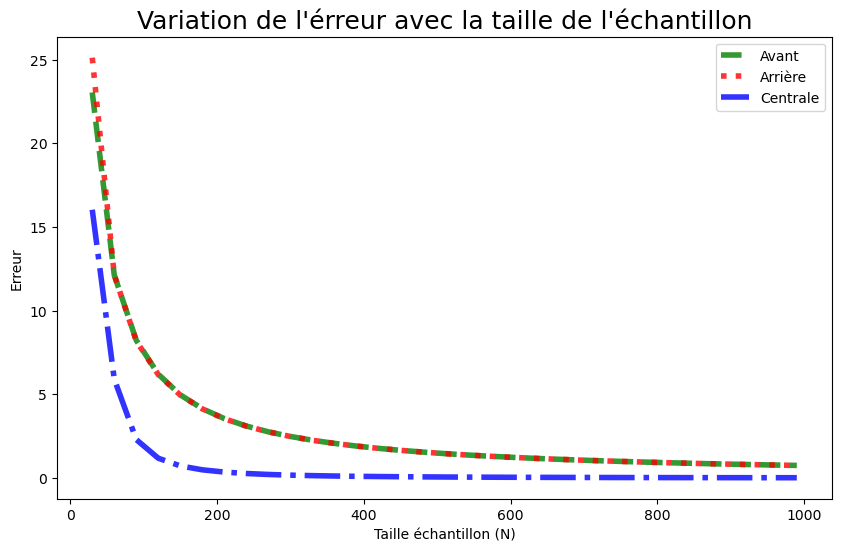

In [14]:
erreur = {"arrière" :[],
          "avant" : [],
          "centre" : []
        }

N = range( 30 , 1000 , 30 )

def f(t) :
    return np.sin(2*np.pi*3*t) - np.cos(2*np.pi*5*t)

def df( t ) :
    return 2*np.pi*( 3*np.cos(2*np.pi*3*t)  + 5*np.sin(2*np.pi*5*t))

for der in ["centre", "avant", "arrière"] :
    for n in N :
        t = np.linspace( 0 , 2, n )
        if der == "centre" :
            df_approx = derive_object.derivee_centrale_a_1_point( f(t) , t[1] )
        elif der == "avant" :
            df_approx = derive_object.derivee_avant_a_1_point( f(t) , t[1] )
        elif der == "arrière" :
            df_approx = derive_object.derivee_arrière_a_1_point( f(t) , t[1] )
        
        erreur[der].append( derive_object.erreur( df(t) , df_approx ) )

plt.figure(figsize = (10,6))

plt.plot(N , erreur["avant"] , lw = 4 ,alpha = 0.8, color = "green" , ls='dashed', label="Avant")
plt.plot(N , erreur["arrière"] , lw = 4 ,alpha = 0.8, color = "red" , ls='dotted', label="Arrière")
plt.plot(N , erreur["centre"] , lw = 4 ,alpha = 0.8, color = "blue" , ls='dashdot', label="Centrale")

plt.xlabel( "Taille échantillon (N)" )
plt.ylabel( "Erreur",  )

plt.title( "Variation de l'érreur avec la taille de l'échantillon" , size =18 )
plt.legend()
plt.show()

---

- ## <strong> Authors </strong>

 #### <ul> <p> - <strong><a href="https://www.linkedin.com/in/brice-kengni-zanguim/" target="_blank">Brice KENGNI ZANGUIM :</a> </strong></p> <ul> Artificial Intelligence Engeneer at home and holds a PhD in Nano-physic. His research focused on using <strong>Machine Learning, Deep Learning, Signal Processing, Natural langage Processing, Computer Vision and so one</strong> to figure out how the world behave and impact human cognition. Brice KENGNI ZANGUIM has been working at home on mastering his own AI projects in many domains while seeking for a position in a company. </ul></ul>


---

- ## <strong> Other Contributors </strong>

#### <ul>None</ul>

---

- ## <strong> Change Log </strong>

|  Date (DD-MM-YYYY) |  Version | Changed By  |  Change Description |  Purpose  |
|---|---|---|---|---|
| 13- 03 - 2023 | 2.0 | Brice KENGNI ZANGUIM | Final update | Mem,save |
|-|-|-|-|
|   |   |   |   |   |

### <h3 align="center"> © BKZ Corporation 2023. All rights reserved. <h3/>
---